In [2]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############
import pickle as pkl
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from equations.class_subcircuit_eq import *
from sklearn.metrics import mean_squared_error


In [3]:
def plotDoseResponse2(inducer,doseResponseRed, doseResponseGreen,semRed, semGreen, pad=0.01):
    fig,ax = plt.subplots()

    ax.plot(inducer,doseResponseRed,label='RFP', c='red')
    ax.errorbar(inducer,doseResponseRed,yerr=semRed,c='red',fmt='o')
    ax.legend(loc='center left') #upper right
    # ax.ticklabel_format(useOffset=False)
    ax.set_xscale('log')


    ax2=ax.twinx()
    ax2.plot(inducer,doseResponseGreen,label='GFP', c='green')
    ax2.errorbar(inducer,doseResponseGreen,yerr=semGreen,c='green',fmt='o')
    ax2.legend(loc='center right') #upper left
    # ax2.ticklabel_format(useOffset=False)
    ax.set_xscale('log')


    plt.show()
def plotDoseResponsevsData(inducer,inducer_continuous, rfpExp_list, gfpExp_list, semRed, semGreen, doseResponseRed,doseResponseGreen,pad=0.01):
    fig,ax = plt.subplots()

    ax.plot(inducer_continuous,doseResponseRed,label='RFP', c='red')
    ax.scatter(inducer,rfpExp_list, c='red')
    ax.errorbar(inducer,rfpExp_list,yerr=semRed,c='red',fmt='o')
    ax.legend(loc='center left') #upper right
    # ax.ticklabel_format(useOffset=False)
    ax.set_xscale('log')


    ax2=ax.twinx()
    ax2.plot(inducer_continuous,doseResponseGreen,label='GFP', c='green')
    ax2.scatter(inducer,gfpExp_list, c='green')
    ax2.errorbar(inducer,gfpExp_list,yerr=semGreen,c='green',fmt='o')
    ax2.legend(loc='center right') #upper left
    # ax2.ticklabel_format(useOffset=False)
    ax.set_xscale('log')


    plt.show()

def plotDoseResponse(inducer_list, U_ss, color='k'):
    plt.plot(inducer_list,U_ss, c=color)
    plt.xlabel('[inducer]')
    plt.ylabel('Fluorescence')
    plt.xscale('log')
    plt.show()

def doseResponse(subcircuit, inducer_list, initial_conditions=[10,10]):
    U_ss = []
    T=1000
    t = np.linspace(0, T, T*50)
    for inducer in inducer_list:
        sol = odeint(subcircuit.ddt, initial_conditions, t, args=(inducer,inducer))
        Ustar_ODE=sol[-1]
        U_ss.append(sol[-1])
    return np.array(U_ss)

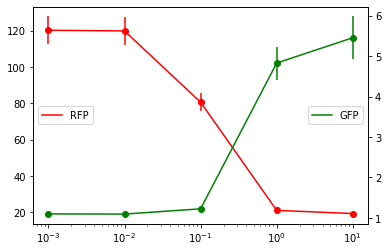

array([1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03])

In [4]:
doseResponseExp = pkl.load(open('input/subcircuit1_circuit14_doseResponse_maxATC.pkl','rb'))
AHL_list = doseResponseExp['AHL_list']; gfpExp_list = doseResponseExp['maxATC_doseResponse_gfp']; rfpExp_list = doseResponseExp['maxATC_doseResponse_rfp']
semRed = doseResponseExp['maxATC_doseResponse_rfp_sem']; semGreen = doseResponseExp['maxATC_doseResponse_gfp_sem']


plotDoseResponse2(AHL_list, rfpExp_list, gfpExp_list, semRed, semGreen)
AHL_list

<ipython-input-5-9c5fad055009>:6: RuntimeWarning: overflow encountered in power
  return mu*( 1 + V * (1 / (1 + (km / (X+1e-08)) ** (n)) ))


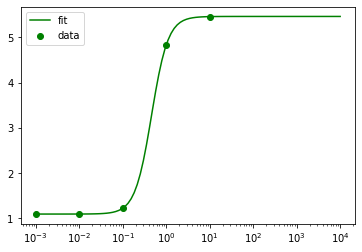

mu = 1.097, V = 3.976, km = 0.46, n = 2.291


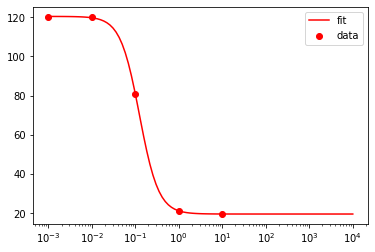

mu = 19.429, V = 5.199, km = 0.124, n = -1.976


In [5]:
from scipy.optimize import curve_fit
A_list = np.logspace(-3,4, 100)


def bioSigmoid(X,mu, V, km, n): 
     return mu*( 1 + V * (1 / (1 + (km / (X+1e-08)) ** (n)) ))

parameters, covariance = curve_fit(bioSigmoid, AHL_list, gfpExp_list, p0=[1, 5, 0.1,4])
gfpFit = bioSigmoid(A_list, *parameters)
plt.plot(A_list,gfpFit , label='fit', c='green')
plt.scatter(AHL_list,gfpExp_list , label='data', c='green')
plt.xscale('log')
plt.legend()
parameters = np.round(parameters,3)
plt.show()

print(f'mu = {parameters[0]}, V = {parameters[1]}, km = {parameters[2]}, n = {parameters[3]}')
parameters, covariance = curve_fit(bioSigmoid, AHL_list, rfpExp_list, p0=[1, 5, 0.1,-2])
rfpFit = bioSigmoid(A_list, *parameters)
plt.plot(A_list,rfpFit , label='fit', c='red')
plt.scatter(AHL_list,rfpExp_list , label='data', c='red')
plt.xscale('log')
plt.legend()
parameters = np.round(parameters,3)
plt.show()
print(f'mu = {parameters[0]}, V = {parameters[1]}, km = {parameters[2]}, n = {parameters[3]}')


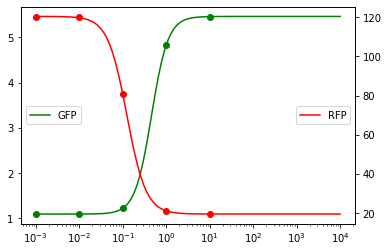

In [6]:
fig,ax = plt.subplots()
# ax.ticklabel_format(style='plain')      
ax.plot(A_list,gfpFit,label='GFP', c='green')
ax.scatter(AHL_list, gfpExp_list, c='green')
ax.legend(loc='center left') #upper left
ax.ticklabel_format(useOffset=False)

ax2=ax.twinx()
ax2.plot(A_list,rfpFit,label='RFP', c='red')
ax2.scatter(AHL_list, rfpExp_list, c='red')
ax2.legend(loc='center right') #upper right

ax2.ticklabel_format(useOffset=False)
ax.set_xscale('log')
plt.show()